In [1]:
!pip install pycountry_convert # 필요한 패키지 다운로드

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 24.9 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=65b3fc0059a08835b750ea40f01986fb2277d4cec1915485030ab4aaab722213
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


# 데이터 적재

In [2]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2015.csv')
df2 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2016.csv')
df3 = pd.read_csv('/content/drive/MyDrive/practice_data/marathon_results_2017.csv') # 총 3년 동안의 데이터 전부 불러오기

# 데이터 탐색 및 전처리

In [3]:
# 이전 차시와 거의 동일한 전처리 수행

df1['Year'] = 2015
df2['Year'] = 2016
df3['Year'] = 2017

df = pd.concat([df1, df2, df3], ignore_index=True)
df = df.drop(['Bib', 'Name', 'City', 'State', 'Unnamed: 0', 'Citizen', 'Unnamed: 9', 'Proj Time', 'Gender', 'Division', 'Unnamed: 8'], axis=1)
df = df.dropna()

time_columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']

for col in time_columns:
  df = df[~df[col].str.startswith('-')]

for col in time_columns:
  df[col] = pd.to_timedelta(df[col]).dt.total_seconds() / 60

df = df.reset_index(drop=True)

df

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year
0,25,M,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,1,2015
1,30,M,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2,2015
2,29,M,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,3,2015
3,28,M,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,4,2015
4,32,M,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79033,19,M,USA,35.233333,70.550000,107.833333,153.966667,162.800000,241.183333,282.983333,333.250000,402.850000,16.200000,424.550000,26406,2017
79034,61,F,USA,46.733333,95.683333,143.583333,192.733333,203.516667,252.100000,303.133333,355.300000,406.950000,16.400000,429.650000,26407,2017
79035,25,M,USA,32.050000,65.550000,112.283333,169.683333,180.433333,230.316667,290.016667,353.800000,414.350000,16.666667,436.983333,26408,2017
79036,64,M,USA,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,26410,2017


In [4]:
df.isnull().sum()

Age              0
M/F              0
Country          0
5K               0
10K              0
15K              0
20K              0
Half             0
25K              0
30K              0
35K              0
40K              0
Pace             0
Official Time    0
Overall          0
Year             0
dtype: int64

## Country(국가) 데이터를 Continent(대륙) 데이터로 변환

In [5]:
df['Country'].unique()

array(['ETH', 'KEN', 'USA', 'UKR', 'RSA', 'ITA', 'RUS', 'JPN', 'CAN',
       'BEL', 'NZL', 'BLR', 'AUS', 'GBR', 'CRO', 'ECU', 'GER', 'ESP',
       'SWE', 'BRA', 'HKG', 'MEX', 'DEN', 'MAS', 'IRL', 'ISL', 'CHI',
       'GUA', 'FIN', 'SVK', 'COL', 'SUI', 'CHN', 'AUT', 'NED', 'FRA',
       'CRC', 'CYP', 'POL', 'NOR', 'KOR', 'POR', 'TPE', 'PER', 'SIN',
       'PAN', 'VEN', 'LUX', 'CZE', 'VIE', 'MAR', 'BER', 'ROU', 'IND',
       'LIE', 'ARG', 'ESA', 'DOM', 'ISR', 'GRE', 'SLO', 'LTU', 'URU',
       'CAY', 'EST', 'JAM', 'UAE', 'VGB', 'TUR', 'LAT', 'AND', 'OMA',
       'BAH', 'TRI', 'INA', 'AHO', 'PHI', 'UGA', 'ZIM', 'TWN', 'HON',
       'FLK', 'HUN', 'JOR', 'ALB', 'SRB', 'PAK', 'BRN', 'BDI', 'EGY',
       'THA', 'MLT', 'KSA', 'SMR', 'BUL', 'ALG', 'NCA', 'BAR', 'GRN',
       'PAR', 'TCA', 'KUW', 'MGL', 'NGR'], dtype=object)

- 범주형 변수가 종류가 너무 많을 경우 인코딩해서(숫자 데이터로 만들어서) 사용했을 때 예측 성능 향상에 도움이 되지 않음

In [6]:
import pycountry_convert as pc # 국가와 대륙의 이름 및 코드를 변환하는 파이썬 패키지

df['Continent'] = df['Country'].map(pc.map_country_alpha3_to_country_alpha2())

In [7]:
df['Continent'].isnull().sum()

1915

In [8]:
df = df.dropna()

- 패키지에 존재하지 않는 국가 코드는 제거

In [9]:
df['Continent'] = df['Continent'].apply(pc.country_alpha2_to_continent_code)

<ipython-input-9-a879e3f00b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Continent'] = df['Continent'].apply(pc.country_alpha2_to_continent_code)


- 국가 코드 -> 대륙 코드로 변경

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

oe = OrdinalEncoder()
oh = OneHotEncoder(sparse=False)

In [11]:
df[['Continent_C']] = oe.fit_transform(df[['Continent']]) # input으로 series가 아닌 dataframe을 넣어야 함

<ipython-input-11-e4badd8a1344>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Continent_C']] = oe.fit_transform(df[['Continent']]) # input으로 series가 아닌 dataframe을 넣어야 함


- 범주가 많을 때는 Ordinal encoding이 적절

In [12]:
mf_arr = oh.fit_transform(df[['M/F']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
oh.categories_

[array(['F', 'M'], dtype=object)]

In [14]:
df['MF_F'] = mf_arr[:,0]
df['MF_M'] = mf_arr[:,1] # 위의 카테고리 출력 결과에서 보인 순서대로 F, M에 해당

<ipython-input-14-4c25320c0938>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MF_F'] = mf_arr[:,0]
<ipython-input-14-4c25320c0938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MF_M'] = mf_arr[:,1] # 위의 카테고리 출력 결과에서 보인 순서대로 F, M에 해당


- 범주가 적을 때는 One-hot encoding이 적절

In [15]:
df # 인코딩된 범주형 변수 확인

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Year,Continent,Continent_C,MF_F,MF_M
0,25,M,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,1,2015,AF,0.0,0.0,1.0
1,30,M,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2,2015,AF,0.0,0.0,1.0
2,29,M,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,3,2015,AF,0.0,0.0,1.0
3,28,M,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,4,2015,AF,0.0,0.0,1.0
4,32,M,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,5,2015,AF,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79033,19,M,USA,35.233333,70.550000,107.833333,153.966667,162.800000,241.183333,282.983333,333.250000,402.850000,16.200000,424.550000,26406,2017,NA,3.0,0.0,1.0
79034,61,F,USA,46.733333,95.683333,143.583333,192.733333,203.516667,252.100000,303.133333,355.300000,406.950000,16.400000,429.650000,26407,2017,NA,3.0,1.0,0.0
79035,25,M,USA,32.050000,65.550000,112.283333,169.683333,180.433333,230.316667,290.016667,353.800000,414.350000,16.666667,436.983333,26408,2017,NA,3.0,0.0,1.0
79036,64,M,USA,40.566667,87.316667,137.283333,191.666667,202.500000,246.166667,307.150000,366.116667,416.133333,16.816667,440.733333,26410,2017,NA,3.0,0.0,1.0


In [17]:
X = df[['Age', '5K', 'Year', 'Continent_C', 'MF_F', 'MF_M']] # 6개의 칼럼만 가지고 예측 모델 설계
y = df['Official Time'] # target variable은 마라톤 시간

# 학습 데이터와 시험 데이터 준비

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

- 전체 데이터를 랜덤으로 70%와 30%로 나눠, 각각 학습 데이터와 시험 데이터로 사용

# 지도학습 모델 학습하기

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = dict()
mae = dict()
r2 = dict()

mse['Linear Regression'] = mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

mae['Linear Regression'] = mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

r2['Linear Regression'] = r2_score(y_test, y_pred)
print(r2_score(y_test, y_pred))

330.78115228100296
13.211806489410586
0.808439754409852


- 성능 평가 지표 3가지 채택 (MSE, MAE, R square)

## Lasso Regression

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse['Lasso Regression'] = mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

mae['Lasso Regression'] = mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

r2['Lasso Regression'] = r2_score(y_test, y_pred)
print(r2_score(y_test, y_pred))

334.2182416647208
13.336525361512537
0.8064492852373493


## Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mse['Ridge Regression'] = mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

mae['Ridge Regression'] = mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

r2['Ridge Regression'] = r2_score(y_test, y_pred)
print(r2_score(y_test, y_pred))

330.78122109328154
13.211812297507254
0.8084397145596462


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse['Random Forest'] = mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

mae['Random Forest'] = mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

r2['Random Forest'] = r2_score(y_test, y_pred)
print(r2_score(y_test, y_pred))

398.67407772285964
14.514119066549851
0.769121959602646


## XGBoost

In [25]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=10)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse['XGBoost'] = mean_squared_error(y_test, y_pred)
print(mean_squared_error(y_test, y_pred))

mae['XGBoost'] = mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

r2['XGBoost'] = r2_score(y_test, y_pred)
print(r2_score(y_test, y_pred))

328.8152692752463
13.056614331612007
0.8095782262628805


# 성능 평가 및 시각화

In [26]:
mse

{'Linear Regression': 330.78115228100296,
 'Lasso Regression': 334.2182416647208,
 'Ridge Regression': 330.78122109328154,
 'Random Forest': 398.67407772285964,
 'XGBoost': 328.8152692752463}

In [27]:
mae

{'Linear Regression': 13.211806489410586,
 'Lasso Regression': 13.336525361512537,
 'Ridge Regression': 13.211812297507254,
 'Random Forest': 14.514119066549851,
 'XGBoost': 13.056614331612007}

In [28]:
r2

{'Linear Regression': 0.808439754409852,
 'Lasso Regression': 0.8064492852373493,
 'Ridge Regression': 0.8084397145596462,
 'Random Forest': 0.769121959602646,
 'XGBoost': 0.8095782262628805}

- XGBoost가 가장 좋은 성능을 보임

In [30]:
keys = X.columns
values = xgb.feature_importances_.tolist()

importances = dict(zip(keys, values))
importances

{'Age': 0.014265979640185833,
 '5K': 0.8818912506103516,
 'Year': 0.07259311527013779,
 'Continent_C': 0.013787400908768177,
 'MF_F': 0.01746232621371746,
 'MF_M': 0.0}

<Axes: >

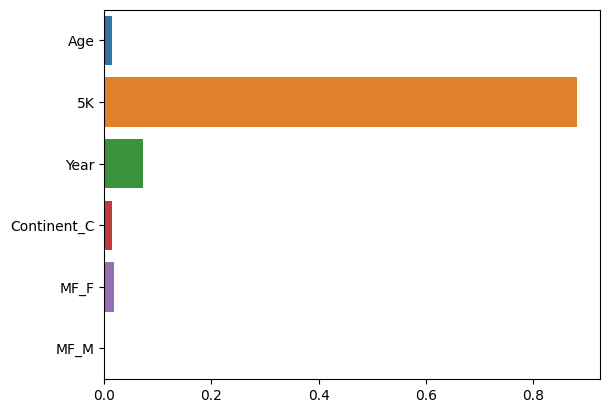

In [31]:
import seaborn as sns

sns.barplot(x=values, y=keys)

- Feature importance 시각화
- 예측 성능 향상에 도움이 되는 중요한 변수는 5K와 Year